In [34]:
# Import required libraries and dependencies
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import hvplot.pandas


In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("C:/Users/dixon/OneDrive/Desktop/CryptoClustering/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df[["price_change_percentage_24h", "price_change_percentage_7d",
                                                                    "price_change_percentage_14d", "price_change_percentage_30d",
                                                                    "price_change_percentage_60d", "price_change_percentage_200d",
                                                                    "price_change_percentage_1y"]])


In [6]:
#Display the first 5 rows of the scaled data
market_data_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [7]:
# Verify the data type and shape of market_data_scaled
print(type(market_data_scaled))
print(market_data_scaled.shape)


<class 'numpy.ndarray'>
(41, 7)


In [8]:
# Create a DataFrame with the scaled data
market_data_scaled = pd.DataFrame(
    market_data_scaled, 
    columns=[
        "price_change_percentage_24h", "price_change_percentage_7d",
        "price_change_percentage_14d", "price_change_percentage_30d",
        "price_change_percentage_60d", "price_change_percentage_200d",
        "price_change_percentage_1y"]
)

# Copy the crypto names from the original data
market_data_df["price_change_percentage_24h"] = market_data_scaled["price_change_percentage_24h"]
market_data_df["price_change_percentage_7d"] = market_data_scaled["price_change_percentage_7d"]
market_data_df["price_change_percentage_14d"] = market_data_scaled["price_change_percentage_14d"]
market_data_df["price_change_percentage_30d"] = market_data_scaled["price_change_percentage_30d"]
market_data_df["price_change_percentage_60d"] = market_data_scaled["price_change_percentage_60d"]
market_data_df["price_change_percentage_200d"] = market_data_scaled["price_change_percentage_200d"]
market_data_df["price_change_percentage_1y"] = market_data_scaled["price_change_percentage_1y"]

# Set the coinid column as index
market_data_scaled["coinid"]=market_data_df.index
market_data_scaled = market_data_scaled.set_index("coinid")

# Display sample data
market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coinid,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [9]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11


# Create an empty list to store the inertia values
inertia=[]
k=list(range(1,11))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

# Create a dictionary with the data to plot the Elbow curve
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(market_data_scaled)
    inertia.append(k_model.inertia_)

# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow



c:\Users\dixon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dixon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dixon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dixon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,68.243549
5,6,61.096844
6,7,50.255840
7,8,40.888474
8,9,32.768762
9,10,29.090066


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

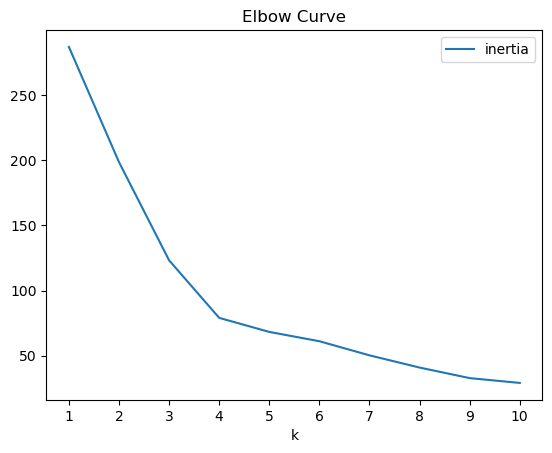

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                   y = "inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**Four (4) is the best value

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [11]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, n_init="auto", random_state=1)

In [12]:
# Fit the K-Means model using the scaled data
model.fit(market_data_scaled)

c:\Users\dixon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=1)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_clusters = model.predict(market_data_scaled)

# View the resulting array of cluster values.
print(market_clusters)

[1 1 2 2 1 1 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 0 2 2 2 1
 2 2 2 2]


In [14]:
# Create a copy of the DataFrame
market_data_scaled_predictions = market_data_scaled.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
market_data_scaled_predictions["market_clusters"] = market_clusters

# Display sample data
market_data_scaled_predictions

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,market_clusters
coinid,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,1
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,1
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,1
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

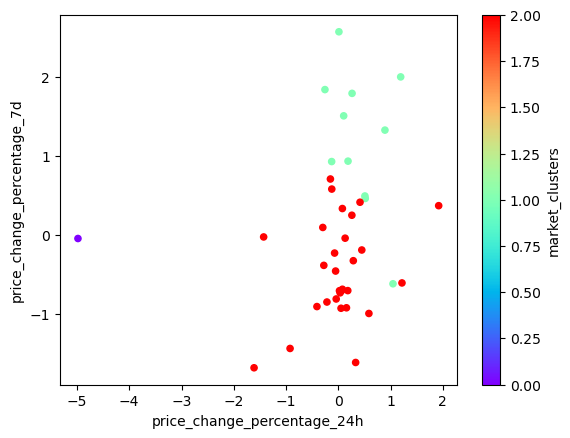

In [16]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

market_data_scaled_predictions.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="market_clusters",
    colormap="rainbow",
    )


### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_pca_data = pca.fit_transform(market_data_scaled)

# View the first five rows of the DataFrame. 
market_pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [19]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895597523 (89% of the data)

In [20]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
df_market_pca = pd.DataFrame(market_pca_data, columns=["PCA1", "PCA2", "PCA3"])

# Copy the crypto names from the original data
df_market_pca["coin_id"] = market_data_df.index

# Set the coinid column as index
df_market_pca = df_market_pca.set_index("coin_id")

# Display sample data
df_market_pca.head()



,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11


# Create an empty list to store the inertia values
inertia = []
k = list(range(1, 11))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(df_market_pca)
    inertia.append(k_model.inertia_)
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head()



c:\Users\dixon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dixon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dixon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dixon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,39.094217


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

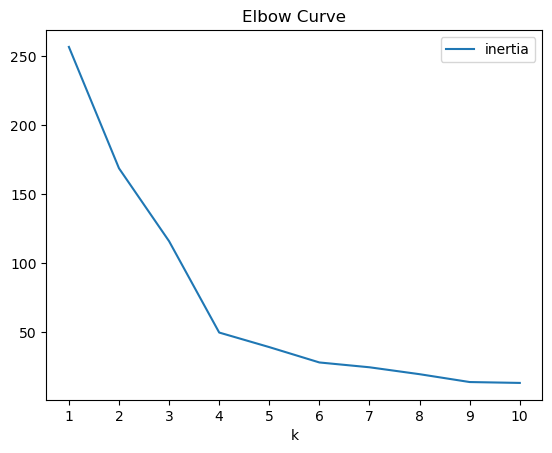

In [22]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                    y="inertia",
                    title="Elbow Curve",
                    xticks=k
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it is the same.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [23]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)


In [24]:
# Fit the K-Means model using the PCA data
model.fit(df_market_pca )

c:\Users\dixon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=1)

In [25]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = model.predict(df_market_pca )

# Print the resulting array of cluster values.
k_4

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0])

In [28]:
# Create a copy of the DataFrame with the PCA data
market_predictions_df = df_market_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
market_predictions_df["customer_segment"] = k_4
# Display sample data
market_predictions_df.head()



,PCA1,PCA2,PCA3,customer_segment
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [35]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
market_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="customer_segment",
    cmap='Category10',
    title="Cryptocurrency Clusters",
    xlabel="PCA1",
    ylabel="PCA2",
    hover_cols=['PCA3', 'customer_segment']
)


:Scatter   [PCA1]   (PCA2,customer_segment,PCA3)

### Determine the Weights of Each Feature on each Principal Component

In [30]:
# Use the columns from the original scaled DataFrame as the index.


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    